# 2nd Order BRF {#sec-2nd-order-brf}

## Introduction
This notebook walks through the Python code used to find the transfer function of the circuit shown in @fig-BRF-sch. 

![Band reject filter schematic](2nd_order_BRF.png){#fig-BRF-sch}

## Circuit description
The circuit above is a 2nd order band reject filter, problem 13-20 from @Budak1974. The schematic of the circuit is shown with each node annotated. The problem asks to obtain the transfer function, $\frac {V_2} {V_1}$.

The net list for this circuit is:
```
O1 2 5 2 
V1 1 0 1
C3 3 0 2
C1 4 1 1
C2 5 4 1
R1 2 4 0.5
R2 3 1 1
R3 5 3 1
```
The following Python modules are used in this notebook.

In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [2]:
net_list = '''
O1 2 5 2 
V1 1 0 1
C3 3 0 2
C1 4 1 1
C2 5 4 1
R1 2 4 0.5
R2 3 1 1
R3 5 3 1
'''

## Call the symbolic modified nodal analysis function

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

### Build the network equations

In [4]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = - C_{1} s v_{4} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{2}}\right) - \frac{v_{3}}{R_{2}}$<br>$0 = I_{O1} + \frac{v_{2}}{R_{1}} - \frac{v_{4}}{R_{1}}$<br>$0 = v_{3} \left(C_{3} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{3}} - \frac{v_{1}}{R_{2}}$<br>$0 = - C_{1} s v_{1} - C_{2} s v_{5} + v_{4} \left(C_{1} s + C_{2} s + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{1}}$<br>$0 = - C_{2} s v_{4} + v_{5} \left(C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{3}}{R_{3}}$<br>$V_{1} = v_{1}$<br>$0 = v_{2} - v_{5}$<br>

Turn the free symbols into SymPy variables.

In [5]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

In [6]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [7]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} V_{1} s^{2} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} R_{1} V_{1} s + C_{2} R_{1} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} R_{1} s + C_{3} R_{2} s + 1}$<br>$v_{3} = \frac{C_{1} C_{2} R_{1} R_{2} V_{1} s^{2} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} R_{1} V_{1} s + C_{2} R_{1} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} R_{1} s + C_{3} R_{2} s + 1}$<br>$v_{4} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} V_{1} s^{2} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} C_{3} R_{1} R_{2} V_{1} s^{2} + C_{1} R_{1} V_{1} s + C_{2} R_{1} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} R_{1} s + C_{3} R_{2} s + 1}$<br>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} + C_{1} C_{2} R_{1} R_{2} V_{1} s^{2} + C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} + C_{1} R_{1} V_{1} s + C_{2} R_{1} V_{1} s + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} R_{1} s + C_{3} R_{2} s + 1}$<br>$I_{V1} = \frac{- C_{1} C_{2} C_{3} R_{1} R_{2} V_{1} s^{3} - C_{1} C_{2} C_{3} R_{1} R_{3} V_{1} s^{3} - C_{1} C_{3} R_{1} V_{1} s^{2} - C_{1} C_{3} R_{2} V_{1} s^{2} - C_{2} C_{3} R_{1} V_{1} s^{2} - C_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} R_{1} s + C_{3} R_{2} s + 1}$<br>$I_{O1} = \frac{C_{1} C_{3} R_{2} V_{1} s^{2}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} C_{2} R_{1} R_{3} s^{2} + C_{1} C_{3} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} R_{1} s + C_{3} R_{2} s + 1}$<br>

Symbolic form of the transfer function.

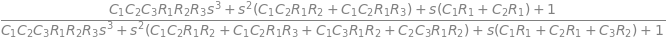

In [8]:
H_sym = (U_sym[v2]/U_sym[v1]).simplify().collect(s)
H_sym

The numerator and denominator of the transfer function can be obtained as follows:

In [9]:
num, den = fraction(H_sym)

The roots of the numerator can be obtained symbolically. Since the degree of the polynominal is a third order, SymPy can solve for the roots and obtain a solution very quickly. The roots expressed in symbolic form are not very useful, but are easily obtained, something that would be almost impossible to do by hand with pencil and paper.

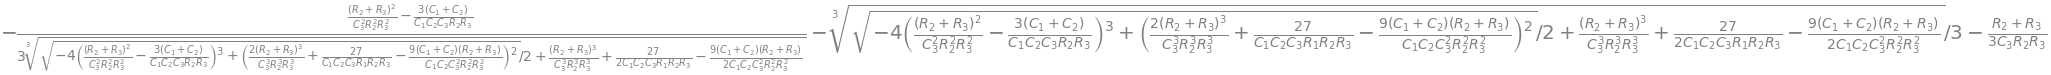

In [10]:
z = solve(num,s)
z[0]

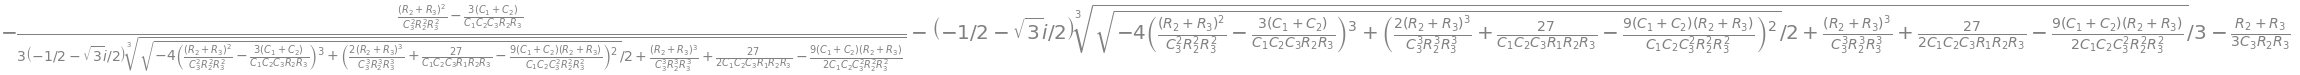

In [11]:
z[1]

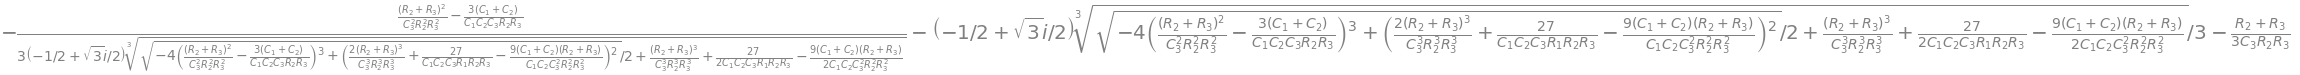

In [12]:
z[2]

The roots of the denominator can be obtained symbolically.

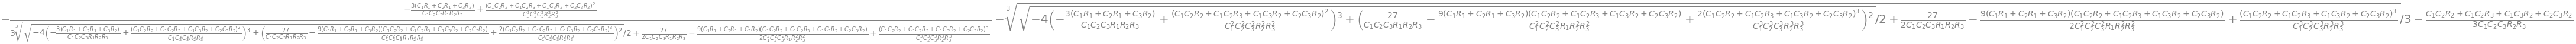

In [13]:
p = solve(den,s)
p[0]

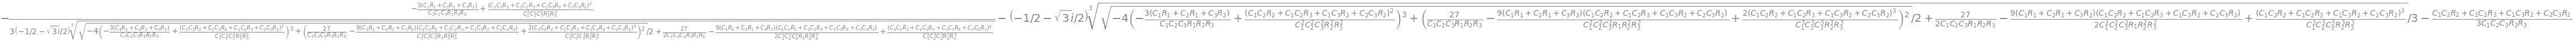

In [14]:
p[1]

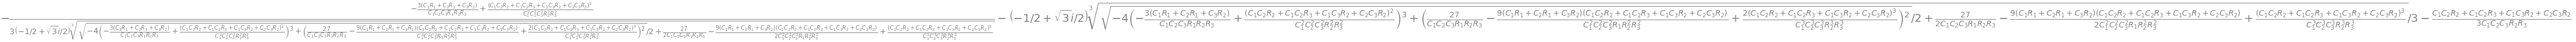

In [15]:
p[2]

## Numerical solution
Construct a dictionary of element values.

In [16]:
element_values = SymMNA.get_part_values(network_df)

# display the component values
for k,v in element_values.items():
    print('{:s} = {:s}'.format(str(k), str(v)))

V1 = 1.0
O1 = nan
C3 = 2.0
C1 = 1.0
C2 = 1.0
R1 = 0.5
R2 = 1.0
R3 = 1.0


Put the component values into the equations.

In [17]:
NE = NE_sym.subs(element_values)

Display the equations with component values.

In [18]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} - 1.0 s v_{4} + v_{1} \cdot \left(1.0 s + 1.0\right) - 1.0 v_{3}$<br>$0 = I_{O1} + 2.0 v_{2} - 2.0 v_{4}$<br>$0 = - 1.0 v_{1} + v_{3} \cdot \left(2.0 s + 2.0\right) - 1.0 v_{5}$<br>$0 = - 1.0 s v_{1} - 1.0 s v_{5} - 2.0 v_{2} + v_{4} \cdot \left(2.0 s + 2.0\right)$<br>$0 = - 1.0 s v_{4} - 1.0 v_{3} + v_{5} \cdot \left(1.0 s + 1.0\right)$<br>$1.0 = v_{1}$<br>$0 = v_{2} - v_{5}$<br>

Solve for voltages and currents and display the results.

In [19]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{s^{2} + 1.0}{s^{2} + 2.0 s + 1.0}$<br>$v_{3} = \frac{s^{2} + s + 1.0}{s^{3} + 3.0 s^{2} + 3.0 s + 1.0}$<br>$v_{4} = \frac{s^{3} + 2.0 s^{2} + s + 1.0}{s^{3} + 3.0 s^{2} + 3.0 s + 1.0}$<br>$v_{5} = \frac{s^{2} + 1.0}{s^{2} + 2.0 s + 1.0}$<br>$I_{V1} = - \frac{2.0 s}{s + 1.0}$<br>$I_{O1} = \frac{2.0 s^{2}}{s^{3} + 3.0 s^{2} + 3.0 s + 1.0}$<br>

### Plot the frequency response of the transfer function

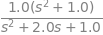

In [20]:
H = U[v2]/U[v1]
H

In [21]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [22]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 2000, endpoint=True)
x = np.logspace(-2, 0, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

Plot the results.  

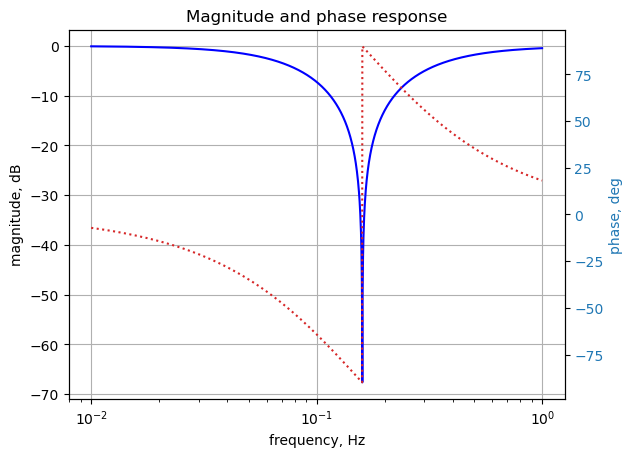

In [23]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

In [24]:
print('null: {:.2f} dB at {:.3f} Hz'.format(mag.min(),w[np.argmin(mag)]/(2*np.pi)))

null: -67.66 dB at 0.159 Hz


### Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [25]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

In [26]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

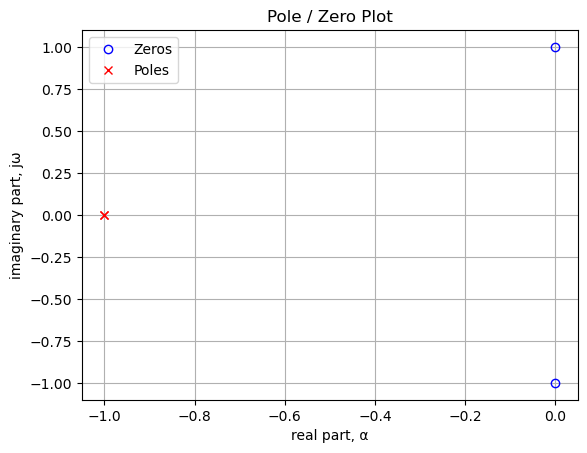

In [27]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [28]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 2
0.00+0.16j Hz
0.00-0.16j Hz


In [29]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 2
-0.16+0.00j Hz
-0.16-0.00j Hz


### Impulse and step response
Use the SciPy functions [impulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html) and [step](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html) to plot the impulse and step response of the system.

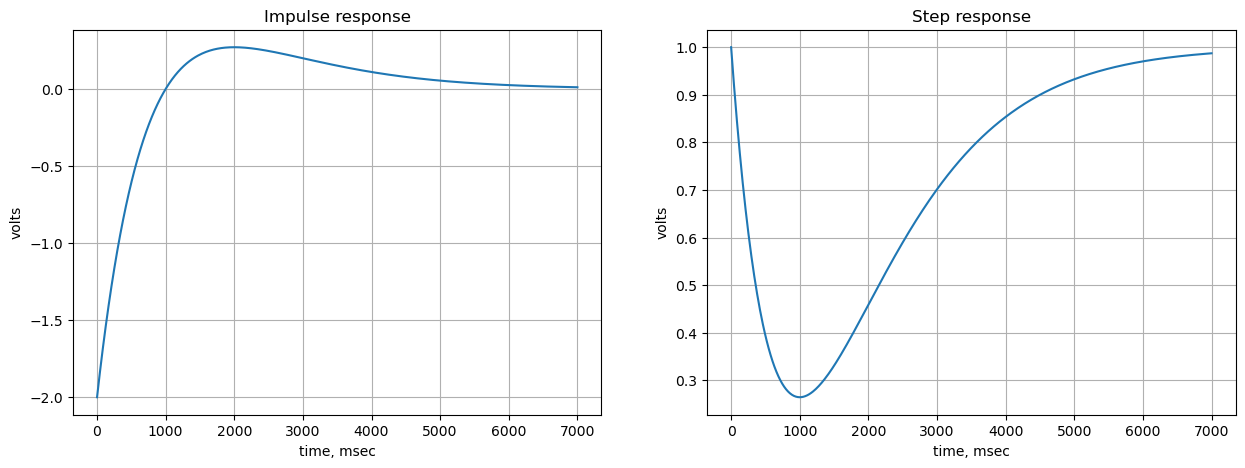

In [30]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()